In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import astropy
from astropy.io import fits
import sys

In [101]:
filename='matchstars_tightmatch_v1.csv'
valsin=np.loadtxt(filename,dtype=float,delimiter=',',skiprows=1)
colvals=np.loadtxt('uds_headerslist.txt',dtype=str,usecols=0)
colval2=np.loadtxt('matchstars_headers',dtype=str,delimiter=' | ')
colnames=np.concatenate((colvals,colval2))
colnames=colnames[0:29]
colnames[28]='Separation'
colnames[9]='id'
colnames[10]='ra'
colnames[11]='dec'
colnames[16]='f_f160w'
print(colnames)

['NUMBER' 'ALPHA_J2000' 'DELTA_J2000' 'FLUX_APER' 'FLUXERR_APER'
 'FWHM_IMAGE' 'FLAGS' 'CLASS_STAR' 'FLUX_RADIUS' 'id' 'ra' 'dec'
 'faper_f160w' 'eaper_f160w' 'faper_f140w' 'eaper_f140w' 'f_f160w'
 'e_f160w ' 'w_f160w ' 'star_flag' 'a_image' 'b_image' 'class_star'
 'flux_radius' 'fwhm_image' 'flags' 'contam_flag' 'use_phot' 'Separation']


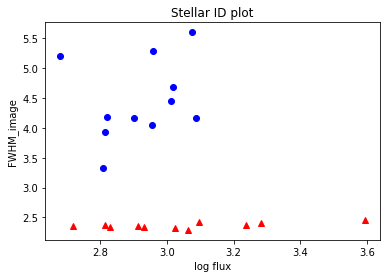

In [96]:
logflux=np.log10(valsin[:,3])
fwhmim=valsin[:,5]
plt.figure()
plt.title('Stellar ID plot')
plt.xlabel('log flux')
plt.ylabel('FWHM_image')

plt.plot(logflux,fwhmim,'bo')
plt.plot(np.log10(valsin[:,12]),valsin[:,23],'r^')
plt.show()

I don't really know what to think about this plot. The red values are the data from 3DHST, the blue the same data from our analysis/sextractor run of the dataset.

Now, onto the math. set phot parameters. ABMAG = -2.5xlogFv -48.6; Fv needs to be ergs/cm2/s/Hz; easy, using photnu instead of photlambda

In [74]:
photfnu=1.518757E-07
photflam=        1.9275602E-20
photplam=            15369.176
#assuming, since photflam is in coordinates of erg/cm2/A/electron, 
#that photfnu is erg/cm2/Hz/electron

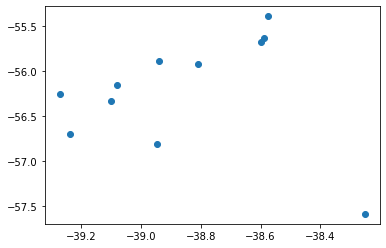

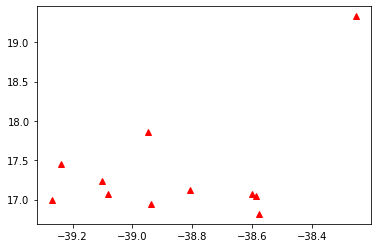

In [131]:
abmag=-2.5*np.log10(photfnu*valsin[:,3])-48.6
abmag_3dhst=-2.5*np.log10(valsin[:,12])-48.6
#the same mathematical process as our fluxes
x = np.linspace(-40, -35, 1000)

plt.plot(abmag,abmag_3dhst,'o')
plt.show()
plt.plot(abmag,abmag-abmag_3dhst,'r^')

That's.... not spectacular. Is it different using a different method?